In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from subprocess import check_output
import seaborn as sns
%matplotlib inline

## Read data ##
Read data and put it into a dataframe.  Clean the data by combining Certified attributes and dropping withdrawn data.

In [3]:
df = pd.read_csv('us_perm_visas.csv', low_memory = False, parse_dates=['decision_date', 'case_received_date'], index_col = ['case_no'])

In [4]:
df = pd.read_csv('us_perm_visas.csv', low_memory = False, parse_dates=['decision_date', 'case_received_date'], index_col = ['case_no'])
df = df[df.case_status != 'Withdrawn']
df.loc[df.case_status == 'Certified-Expired', 'case_status'] = 'Certified'
df['year'] = df['case_received_date'].dt.year
df = df.dropna(axis=1, how='all');
df = df.dropna(axis=0, how='all');
df_nona = df.dropna(axis=0, how='any');
df_nona.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Columns: 154 entries, add_these_pw_job_title_9089 to year
dtypes: datetime64[ns](2), float64(11), object(141)
memory usage: 0.0+ bytes


## Check the number of features that are non-empty ##
This shows how many features have non-empty columns

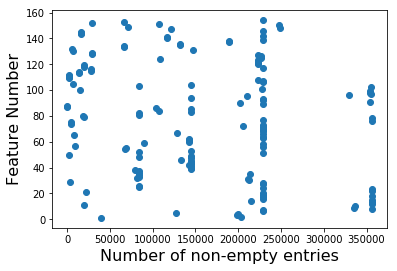

In [6]:
pd.set_option('display.max_colwidth', -1)
i = 0
count_nonnan = [];
ct = [];

for col in df.columns:
    i+=1
    count_nonnan.append(df[col].count())
    ct.append(i)
plt.scatter(count_nonnan, ct)
plt.ylabel('Feature Number', fontsize=16)
plt.xlabel('Number of non-empty entries', fontsize=16)

## Certified vs Denied ##
Number of certified applications vs number of denied applications after dropping withdrawn applications and combining
Certified-Expired with Certified.

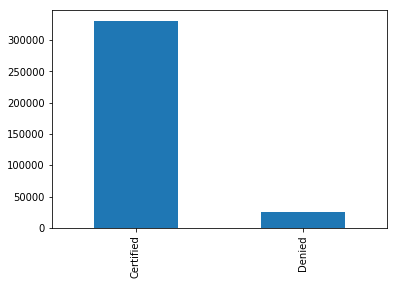

In [7]:
df['case_status'].value_counts().plot(kind = 'bar')

## Application count vs Country ##
201 countries and their application count.  Most of the applications come from India, China, South Korea, Canada, Mexico, and Philippines.

('There are', 201, 'different countries of citizenship in this dataset')


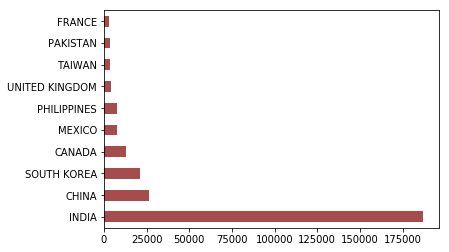

In [8]:
print('There are', df['country_of_citizenship'].value_counts().count(), 'different countries of citizenship in this dataset')
df['country_of_citizenship'].value_counts().head(10).plot(kind = 'barh',color = 'maroon', alpha=0.7)

## Certified vs Denied count of top countries ##

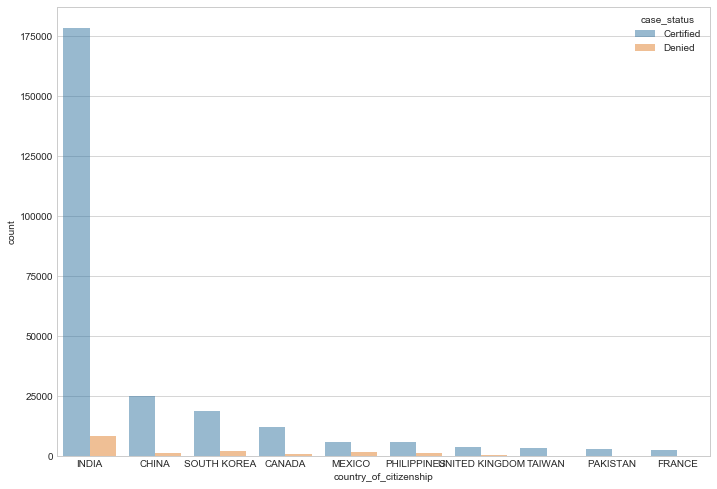

In [9]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.countplot(ax = ax, x='country_of_citizenship', data = df, hue='case_status', order=df.country_of_citizenship.value_counts().iloc[:10].index,alpha = 0.5)#, palette=pkmn_type_colors)

In [14]:
i = 0;
for col in df.columns:
    i = i+1;
    print (i-1, col, 100*df[col].count()/len(df['case_status']))
df[['case_received_date', 'decision_date']]
a = [2,3,7,8,9,11,15,17,18,22,23,77,90,96,98,101];

df2 = df.iloc[:,a];
df2 = df2.dropna(thresh=0.5*len(df), axis=1);
df2.info()


(0, 'add_these_pw_job_title_9089', 10)
(1, 'agent_city', 56)
(2, 'agent_firm_name', 55)
(3, 'agent_state', 56)
(4, 'application_type', 35)
(5, 'case_number', 64)
(6, 'case_received_date', 64)
(7, 'case_status', 100)
(8, 'class_of_admission', 94)
(9, 'country_of_citizenship', 94)
(10, 'country_of_citzenship', 5)
(11, 'decision_date', 100)
(12, 'employer_address_1', 99)
(13, 'employer_address_2', 60)
(14, 'employer_city', 99)
(15, 'employer_country', 64)
(16, 'employer_decl_info_title', 64)
(17, 'employer_name', 99)
(18, 'employer_num_employees', 64)
(19, 'employer_phone', 64)
(20, 'employer_phone_ext', 6)
(21, 'employer_postal_code', 99)
(22, 'employer_state', 99)
(23, 'employer_yr_estab', 64)
(24, 'foreign_worker_info_alt_edu_experience', 23)
(25, 'foreign_worker_info_birth_country', 23)
(26, 'foreign_worker_info_city', 64)
(27, 'foreign_worker_info_education', 64)
(28, 'foreign_worker_info_education_other', 1)
(29, 'foreign_worker_info_inst', 59)
(30, 'foreign_worker_info_major', 59)


## More Cleaning ##

In [19]:

df2.loc[df.case_status == 'Certified', 'case_status'] = 1
df2.loc[df.case_status == 'Denied', 'case_status'] = 0

di = {"Year": 1, "yr": 1, "Hour": 2080, "hr": 2080, "Week": 52, "wk": 52, "Bi-Weekly": 26,"bi": 26, "Month": 12, "mth": 12}
df2['pw_unit_of_pay_9089'].replace(di, inplace=True)

df2['pw_amount_9089'] = df2['pw_amount_9089'].str.replace(',', '')
df2[['pw_amount_9089', 'pw_unit_of_pay_9089']] = df2[['pw_amount_9089', 'pw_unit_of_pay_9089']].astype(float)
df2['pw_amount_9089_new'] = df2['pw_amount_9089']*df2['pw_unit_of_pay_9089']
df2['pw_amount_9089_new']=df2['pw_amount_9089_new'].fillna((df2['pw_amount_9089_new'].mean()))

df2 = df2.drop('pw_amount_9089', 1)
df2 = df2.drop('pw_unit_of_pay_9089', 1)

df2['decision_date'] = df2['decision_date'].dt.year
df2['decision_date'] = df2['decision_date'].astype(int)
df2['decision_date']=df2['decision_date'].fillna((df2['decision_date'].mean()))

df2['agent_state'].fillna('Unknown');

us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
    'Northern Mariana Islands':'MP', 
    'Palau': 'PW', 
    'Puerto Rico': 'PR', 
    'Virgin Islands': 'VI', 
    'District of Columbia': 'DC'
}

us_state_abbrev = {k.upper(): v for k, v in us_state_abbrev.items()}
df2['agent_state'].replace(us_state_abbrev, inplace=True)
df2.agent_state = df2.agent_state.astype(str)
df2['employer_state'] = df2['employer_state'].fillna(df2['employer_state'].mode()[0]);

us_state_abbrev = {k.upper(): v for k, v in us_state_abbrev.items()}
df2['employer_state'].replace(us_state_abbrev, inplace=True)
df2.employer_state = df2.employer_state.astype(str)

df2['job_info_work_state'] = df2['job_info_work_state'].fillna(df2['job_info_work_state'].mode()[0]);

us_state_abbrev = {k.upper(): v for k, v in us_state_abbrev.items()}
df2['job_info_work_state'].replace(us_state_abbrev, inplace=True)
df2.job_info_work_state = df2.job_info_work_state.astype(str)
df2['pw_soc_code'] = df2['pw_soc_code'].str.replace('.','')
df2['pw_soc_code'] = df2['pw_soc_code'].str.replace('-','')
df2['pw_soc_code'] = df2['pw_soc_code'].astype(str).str[0:6]
df2['pw_soc_code'].value_counts()
empty_soc_index = df2['pw_soc_code'] == "nan"
df2['pw_soc_code'][empty_soc_index] = df2['pw_soc_code'].mode()[0];

empty_soc_index = df2['pw_soc_code'] == "None"
df2['pw_soc_code'][empty_soc_index] = df2['pw_soc_code'].mode()[0];
df2['pw_soc_code'] = df2['pw_soc_code'].astype(float)

df2['pw_soc_code'] = df2['pw_soc_code'].astype(int)

df2['case_status'] = df2['case_status'].astype(int)

i = 0;
for col in df2.columns:
    i = i+1;
    print (i-1, col, 100*df2[col].count()/len(df2['case_status']))
df2['class_of_admission']=df2['class_of_admission'].fillna((df2['class_of_admission'].mode()[0]))

df2['country_of_citizenship']=df2['country_of_citizenship'].fillna((df2['country_of_citizenship'].mode()[0]))


df2['employer_name']=df2['employer_name'].fillna((df2['employer_name'].mode()[0]))
df2['employer_name']=df2['employer_name'].astype(str).str.upper()

df2['pw_source_name_9089']=df2['pw_source_name_9089'].fillna((df2['pw_source_name_9089'].mode()[0]))


df2['pw_soc_code'] = df2['pw_soc_code'].astype(str)
df2['pw_soc_code'] = df2['pw_soc_code'].str.replace('-', '')
df2['pw_soc_code'] = df2['pw_soc_code'].str[0:6]

df2['pw_soc_code']=df2['pw_soc_code'].fillna((df2['pw_soc_code'].mode()[0]))

df2['employer_yr_estab']=df2['employer_yr_estab'].fillna(1700.0)
df2['employer_yr_estab'] = df2['employer_yr_estab'].astype(int)
df2['employer_yr_estab'].value_counts()
df2.loc[df['employer_yr_estab'] < 1700, 'employer_yr_estab'] = 1700

df2['employer_country']=df2['employer_country'].fillna((df2['employer_country'].mode()[0]))

df2['employer_num_employees']=df2['employer_num_employees'].fillna((df2['employer_num_employees'].mean()))

i = 0;
for col in df2.columns:
    i = i+1;
    print (i-1, col, 100*df2[col].count()/len(df2['case_status']))

KeyError: 'pw_unit_of_pay_9089'

In [ ]:
import matplotlib.colors as mcolors

def make_colormap(seq):
    """Return a LinearSegmentedColormap
    seq: a sequence of floats and RGB-tuples. The floats should be increasing
    and in the interval (0,1).
    """
    seq = [(None,) * 3, 0.0] + list(seq) + [1.0, (None,) * 3]
    cdict = {'red': [], 'green': [], 'blue': []}
    for i, item in enumerate(seq):
        if isinstance(item, float):
            r1, g1, b1 = seq[i - 1]
            r2, g2, b2 = seq[i + 1]
            cdict['red'].append([item, r1, r2])
            cdict['green'].append([item, g1, g2])
            cdict['blue'].append([item, b1, b2])

    return mcolors.LinearSegmentedColormap('CustomMap', cdict)

c = mcolors.ColorConverter().to_rgb
rvb = make_colormap(
[c('red'), 0.125, c('red'), c('orange'), 0.25, c('orange'),c('green'),0.5, c('green'),0.7, c('green'), c('blue'), 0.75, c('blue')])

N = 60
x = np.arange(N).astype(float)
objects = []
counts = []
i = 0;
for col in df2.columns:
    i = i+1;
    objects.append(col)
    counts.append(100*df2[col].count()/len(df2['case_status']))
    
y_pos = np.arange(len(objects))
plt.figure(figsize=(10, 10))  # width:20, height:3
plt.barh(y_pos, counts, align='edge', alpha=0.5, color = rvb(x/30))
plt.yticks(y_pos, objects)
plt.xlabel('Percentage Filled')
plt.title('Selected Features')

## Application count vs state ##

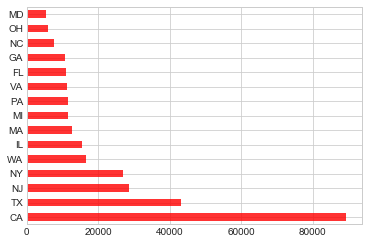

In [20]:
df2['employer_state'].value_counts().head(15).plot(kind='barh',color= rvb(x/20),alpha = 0.8)

## Distribution of class of admission ##
Below is the distribution of the classes of admission

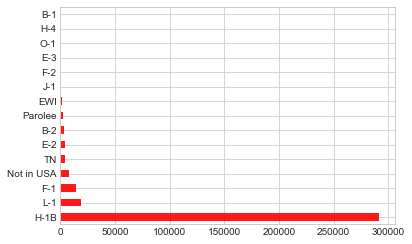

In [21]:
df2['class_of_admission'].value_counts().head(15).plot(kind='barh',alpha = 0.9, color ='red')